# PRACTISE CASE CLUSTERING GERMAN CREDIT
### ANSWERED BY DWI SMARADAHANA INDRALOKA
***

## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

## Upload Dataset

In [2]:
data = pd.read_csv("german_credit_data.csv")

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
data.shape

(1000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


## Data Cleansing

### 1. Count the Percentage of Missing Value

In [6]:
percentage = round(data.isnull().sum()/len(data)*100,2).sort_values(ascending = False)
percentage

Checking account    39.4
Saving accounts     18.3
Purpose              0.0
Duration             0.0
Credit amount        0.0
Housing              0.0
Job                  0.0
Sex                  0.0
Age                  0.0
Unnamed: 0           0.0
dtype: float64

### 2. Handle the missing value

In [7]:
data["Checking account"].fillna(data["Checking account"].mode()[0], inplace = True)
data["Saving accounts"].fillna(data["Saving accounts"].mode()[0], inplace = True)

### 3. Dropping Unused Columns

In [8]:
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [9]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


### 4. Split Numerical Data and Categorical Data

### 4.1. Numerical Data

In [10]:
num_data = ["Age", "Credit amount", "Duration"]
num_data = data[num_data]

In [11]:
num_data.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


### 4.2. Categorical Data

In [12]:
cat_data = data.drop(num_data, axis = 1)
cat_data.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,male,2,own,little,little,radio/TV
1,female,2,own,little,moderate,radio/TV
2,male,1,own,little,little,education
3,male,2,free,little,little,furniture/equipment
4,male,2,free,little,little,car


In [13]:
cat_data.nunique()

Sex                 2
Job                 4
Housing             3
Saving accounts     4
Checking account    3
Purpose             8
dtype: int64

## Visualization

### 1. Scatterplot: Credit Amount VS Duration

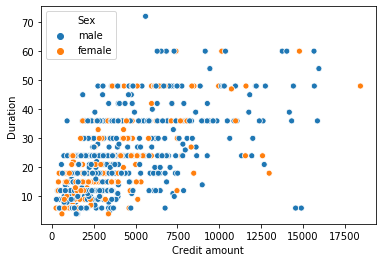

In [14]:
sns.scatterplot(x = "Credit amount", y = "Duration", hue = "Sex", palette = None, data = data)

* There is a positif relation between credit amount and duration

### 2. Scatterplot: Duration VS Age

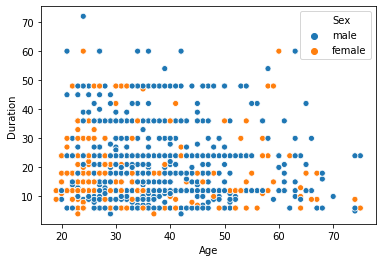

In [15]:
sns.scatterplot(x = "Age", y = "Duration", hue = "Sex", palette = None, data = data)

* There is a no relation between duration and age

### 3. Scatterplot: Credit Amount VS Age

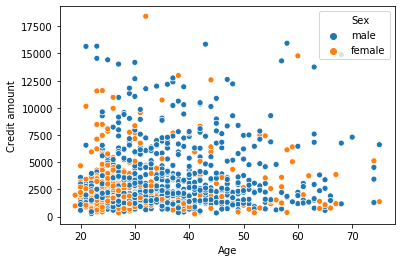

In [16]:
sns.scatterplot(x = "Age", y = "Credit amount", hue = "Sex", palette = None, data = data)

* There is a no relation between duration and age

### 4. Stacked Bar Chart: Purpose VS Numerical Data

Text(0, 0.5, 'Saving Accounts')

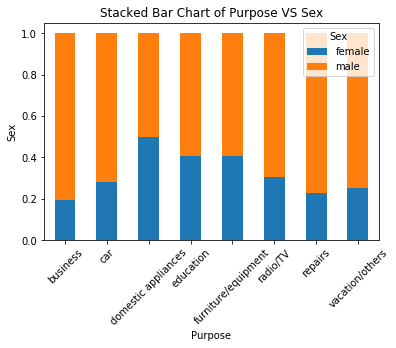

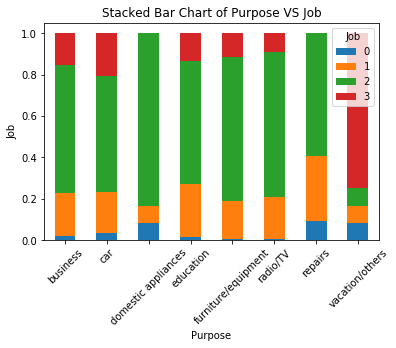

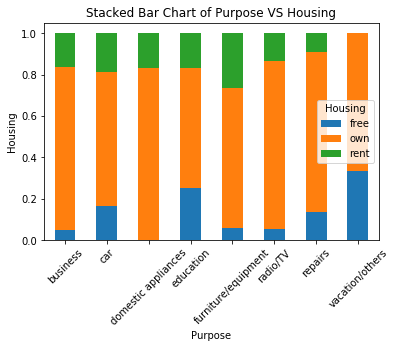

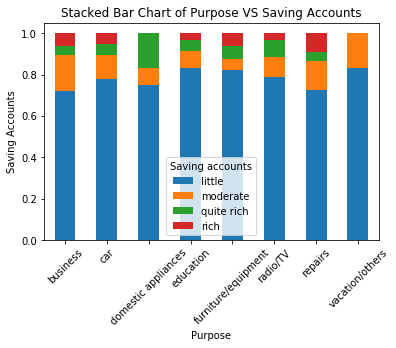

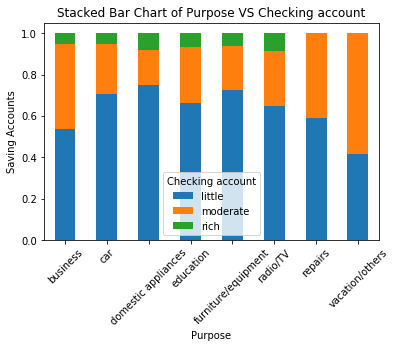

In [17]:
table = pd.crosstab(data["Purpose"],data["Sex"])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xticks(rotation = 45)
plt.title('Stacked Bar Chart of Purpose VS Sex')
plt.xlabel('Purpose')
plt.ylabel('Sex')

table = pd.crosstab(data["Purpose"],data["Job"])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xticks(rotation = 45)
plt.title('Stacked Bar Chart of Purpose VS Job')
plt.xlabel('Purpose')
plt.ylabel('Job')

table = pd.crosstab(data["Purpose"],data["Housing"])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xticks(rotation = 45)
plt.title('Stacked Bar Chart of Purpose VS Housing')
plt.xlabel('Purpose')
plt.ylabel('Housing')

table = pd.crosstab(data["Purpose"],data["Saving accounts"])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xticks(rotation = 45)
plt.title('Stacked Bar Chart of Purpose VS Saving Accounts')
plt.xlabel('Purpose')
plt.ylabel('Saving Accounts')

table = pd.crosstab(data["Purpose"],data["Checking account"])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xticks(rotation = 45)
plt.title('Stacked Bar Chart of Purpose VS Checking account')
plt.xlabel('Purpose')
plt.ylabel('Saving Accounts')

### 5. Barplot: Purpose VS Numerical Data

Text(0.5, 1.0, 'Duration Distribution Data Based on Purpose')

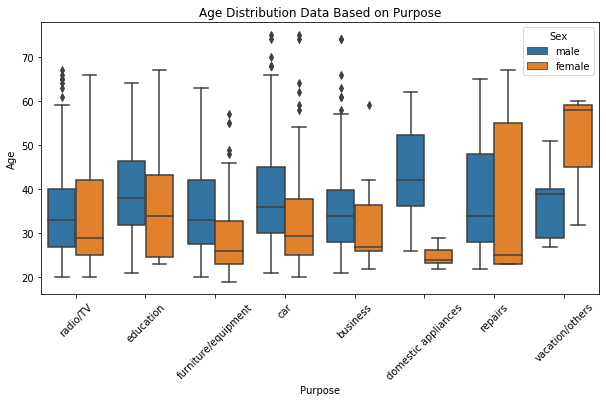

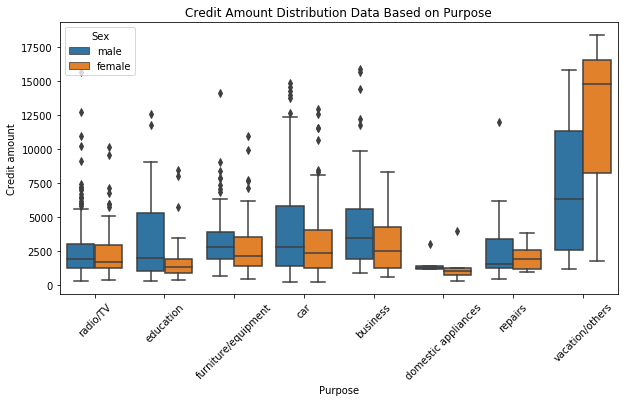

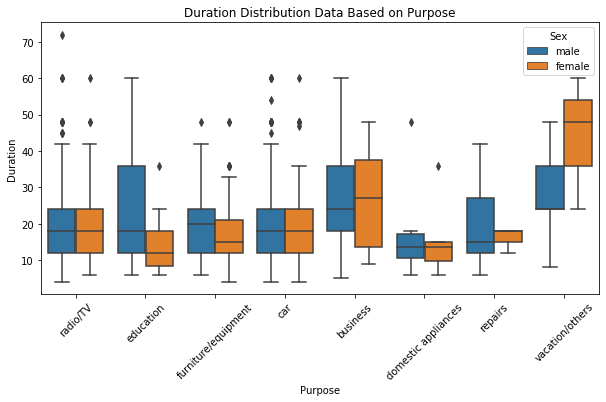

In [18]:
plt.figure(figsize = (10,5))
sns.boxplot(x = data["Purpose"],y = data["Age"], hue = data["Sex"])
plt.xticks(rotation = 45)
plt.title("Age Distribution Data Based on Purpose")

plt.figure(figsize = (10,5))
sns.boxplot(x = data["Purpose"],y = data["Credit amount"], hue = data["Sex"])
plt.xticks(rotation = 45)
plt.title("Credit Amount Distribution Data Based on Purpose")

plt.figure(figsize = (10,5))
sns.boxplot(x = data["Purpose"],y = data["Duration"], hue = data["Sex"])
plt.xticks(rotation = 45)
plt.title("Duration Distribution Data Based on Purpose")

### 6. Dropping Unused Columns Based on Visualization

In [19]:
data.drop(["Saving accounts", "Checking account"], axis = 1, inplace = True)

## Data Preparation for Clustering
One of the subsidiaries company from PT Astra International Tbk that namely Astra Credit Companies is a company that engaged in car credit. To get business insight for this company, we only focus on data with the purpose is for car credit.

In [20]:
data = data[data["Purpose"] == "car"]
data_car = data
data_car.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose
4,53,male,2,free,4870,24,car
7,35,male,3,rent,6948,36,car
9,28,male,3,own,5234,30,car
10,25,female,2,rent,1295,12,car
13,60,male,1,own,1199,24,car


### 2. Make New Columns to Define Estimate Credit per Month

In [21]:
data_car["Credit_per_Month"] = data_car["Credit amount"] / data_car["Duration"]
data_car.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Credit_per_Month
4,53,male,2,free,4870,24,car,202.916667
7,35,male,3,rent,6948,36,car,193.000000
9,28,male,3,own,5234,30,car,174.466667
10,25,female,2,rent,1295,12,car,107.916667
13,60,male,1,own,1199,24,car,49.958333


### 3. Dropping Columns that not used for Clustering

In [22]:
col = ["Age", "Credit_per_Month"]
data1 = data_car[col]
data1.head()

,Age,Credit_per_Month
4,53,202.916667
7,35,193.000000
9,28,174.466667
10,25,107.916667
13,60,49.958333


### 4. Logaritmic Transformation
* We use logaritmic transformation to reduce data distribution

### 4.1 Before

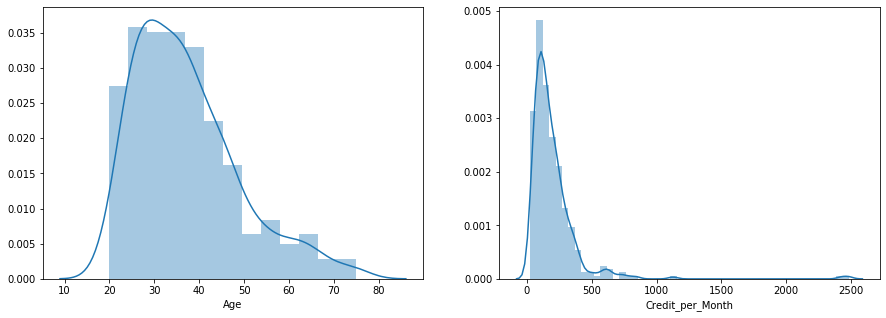

In [23]:
f = plt.figure(figsize = (15,5))

f.add_subplot(1, 2, 1)
sns.distplot(data1["Age"])

f.add_subplot(1, 2, 2)
sns.distplot(data1["Credit_per_Month"])

### 4.2 After

In [24]:
col = ["Age", "Credit_per_Month"]
data2 = data1[col]
data2["Age"] = np.log(data1["Age"])
data2["Credit_per_Month"] = np.log(data1["Credit_per_Month"])
data2.head()

,Age,Credit_per_Month
4,3.970292,5.312795
7,3.555348,5.262690
9,3.332205,5.161734
10,3.218876,4.681359
13,4.094345,3.911189


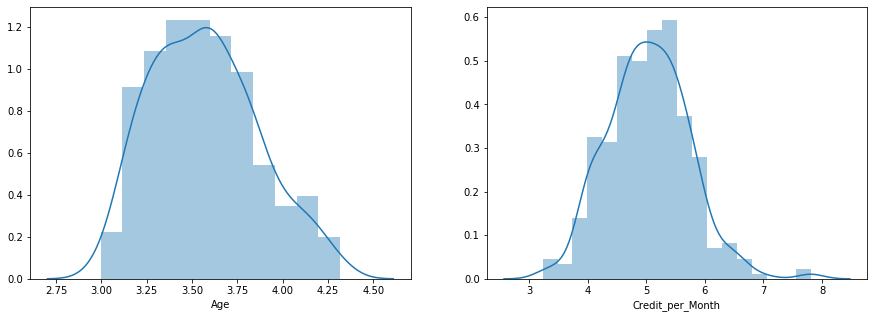

In [25]:
f = plt.figure(figsize = (15,5))

f.add_subplot(1, 2, 1)
sns.distplot(data2["Age"])

f.add_subplot(1, 2, 2)
sns.distplot(data2["Credit_per_Month"])

### 5. Min Max Scaler Transformation
* We use Min Max Scaler because data Age and data Credit per Month have different units

In [26]:
from sklearn.preprocessing import MinMaxScaler
col = data2.columns
data2 = MinMaxScaler().fit_transform(data2)
data2 = pd.DataFrame(data2, columns = col)
data2.head()

,Age,Credit_per_Month
0,0.737322,0.454196
1,0.423388,0.443275
2,0.254565,0.421272
3,0.168824,0.316576
4,0.831176,0.148719


***
## K-Means Clustering
***

### 1 Find Otimal Number of Cluster Using Silhouette and WSS

In [27]:
silhouette = []
inertia = []
K = range(2,16)
for k in K:
    kmeans = KMeans(n_clusters = k, max_iter =1000)
    kmeans = kmeans.fit(data2)
    kmeans.labels_
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data2, kmeans.labels_))

Text(0, 0.5, 'Silhouette Score')

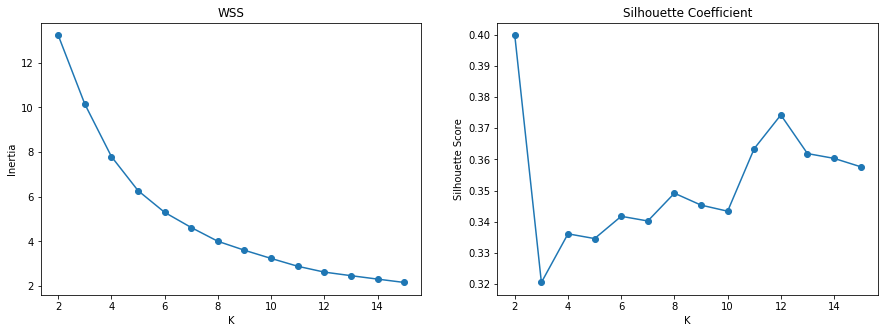

In [28]:
f = plt.figure(figsize = (15,5))

f.add_subplot(1, 2, 1)
plt.plot(K, inertia, marker = "o")
plt.title("WSS")
plt.xlabel("K")
plt.ylabel("Inertia")

f.add_subplot(1, 2, 2)
plt.plot(K, silhouette, marker = "o")
plt.title("Silhouette Coefficient")
plt.xlabel("K")
plt.ylabel("Silhouette Score")

### 2. K-Means Modelling

In [100]:
kmeans = KMeans(n_clusters = 4, max_iter =1000)
kmeans.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 3. K-Means Clustering Result

In [101]:
labels = kmeans.predict(data2)
print(labels)

[3 1 2 1 3 1 1 3 3 0 2 2 3 0 2 1 2 2 3 2 1 1 2 3 0 2 3 3 1 0 2 1 2 2 2 1 0
 3 2 1 2 2 2 2 0 0 2 0 1 3 0 0 3 3 0 0 3 3 0 1 0 1 3 3 2 3 2 1 1 1 0 1 2 1
 2 1 2 1 2 0 1 1 2 1 3 2 0 3 0 0 0 2 1 1 2 2 0 0 1 0 3 2 2 1 0 1 1 2 0 3 3
 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 2 0 2 2 0 2 0 0 0 2 0 2 2 1 1 0 3 1 1 1 1
 0 3 3 0 2 0 2 2 0 1 2 0 1 3 1 2 3 0 1 0 2 2 0 2 0 3 0 3 3 0 0 1 2 2 2 3 1
 0 2 1 1 3 3 1 0 1 2 1 2 0 0 2 1 0 1 2 1 2 0 0 1 0 2 0 1 1 0 2 0 1 2 1 3 0
 0 1 2 0 2 3 2 1 1 0 1 1 2 1 1 1 2 0 2 1 1 0 3 1 0 3 2 1 2 2 0 3 1 0 0 3 1
 3 0 1 3 0 1 2 2 3 2 2 0 3 1 0 1 1 3 1 0 3 2 3 1 0 0 1 3 0 2 2 2 3 0 2 1 3
 0 1 1 0 1 2 0 0 1 2 3 2 2 3 2 0 1 0 2 3 3 2 1 2 1 2 2 0 0 2 1 1 1 0 1 2 2
 2 3 0 1]


Text(0, 0.5, 'Credit per Month')

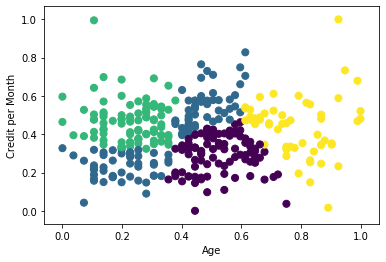

In [102]:
plt.scatter(data2["Age"], data2["Credit_per_Month"], c = labels, s = 50, cmap = 'viridis')
plt.xlabel("Age")
plt.ylabel("Credit per Month")

In [103]:
data_car["labels_KMeans"] = pd.DataFrame(labels)
data_car.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Credit_per_Month,labels_KMeans,labels_HC,labels_DBSCAN
4,53,male,2,free,4870,24,car,202.916667,3.0,4.0,0.0
7,35,male,3,rent,6948,36,car,193.000000,3.0,0.0,0.0
9,28,male,3,own,5234,30,car,174.466667,0.0,3.0,0.0
10,25,female,2,rent,1295,12,car,107.916667,2.0,2.0,0.0
13,60,male,1,own,1199,24,car,49.958333,0.0,3.0,0.0


### 5. Similarity Matrix

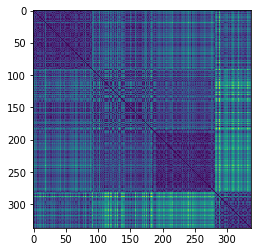

In [104]:
data_clustered = pd.DataFrame(data2)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

### 6. Criteria in Every Cluster

In [105]:
data_cluster1 = data_car.groupby("labels_KMeans")
col = ["Age", "Credit_per_Month"]
data_cluster2 = data_cluster1[col]
data_cluster2.mean().sort_values("Age")

,Age,Credit_per_Month
labels_KMeans,,
3.0,35.866667,179.978148
0.0,36.451613,157.150800
2.0,37.357143,259.183421
1.0,40.655172,255.522055


***
## Hierarchical Clustering
***

### 1. Data for Hierarchical Clustering

In [34]:
col = ["Age", "Credit_per_Month"]
data3 = data2[col]
data3.head()

,Age,Credit_per_Month
0,0.737322,0.454196
1,0.423388,0.443275
2,0.254565,0.421272
3,0.168824,0.316576
4,0.831176,0.148719


### 2. Find Best Method

In [79]:
features = ["single", "complete", "ward", "average"]
for feature in features:
    hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = feature)
    hc.fit(data3)
    labels = hc.labels_
    print(f"Linkage {feature} has score {silhouette_score(data3, labels)}")

Linkage single has score 0.25831538402202514
Linkage complete has score 0.2856084190235399
Linkage ward has score 0.305263832221476
Linkage average has score 0.30375722294547536


### 3. Find Optimal Number of Cluster

In [87]:
K = range(2,16)
for k in K:
    hc = AgglomerativeClustering(n_clusters = k, affinity = "euclidean", linkage = "ward")
    hc.fit(data3)
    labels = hc.labels_
    print(f"Number of cluster {k} has score {silhouette_score(data3, labels)}")

Number of cluster 2 has score 0.38134018802667147
Number of cluster 3 has score 0.31490113463495956
Number of cluster 4 has score 0.2957189533344576
Number of cluster 5 has score 0.305263832221476
Number of cluster 6 has score 0.2989992758696719
Number of cluster 7 has score 0.30157274660256916
Number of cluster 8 has score 0.3044212990551923
Number of cluster 9 has score 0.31057192878107504
Number of cluster 10 has score 0.3209922208955375
Number of cluster 11 has score 0.3314241825352998
Number of cluster 12 has score 0.34102192886133964
Number of cluster 13 has score 0.3355812465872667
Number of cluster 14 has score 0.3342280150532525
Number of cluster 15 has score 0.33846166062614946


### 4. Hierarchical Clustering Modelling

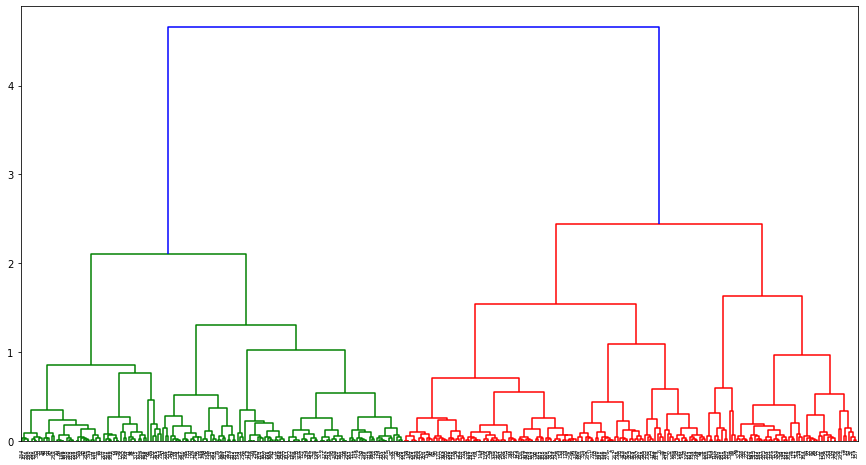

In [88]:
plt.figure(figsize = (15, 8))
dendrogram = sch.dendrogram(sch.linkage(data3, method = "ward"))

### 5. Hierarchical Clustering Result

In [89]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "complete")
hc.fit(data2)
labels1 = hc.labels_
labels1

array([0, 2, 1, 1, 4, 1, 2, 0, 0, 3, 2, 1, 4, 3, 1, 2, 2, 2, 4, 1, 1, 1,
       2, 4, 3, 1, 4, 4, 2, 3, 1, 2, 2, 2, 1, 2, 3, 4, 1, 2, 2, 1, 2, 1,
       3, 3, 2, 3, 1, 0, 3, 3, 0, 4, 3, 3, 0, 4, 3, 1, 3, 2, 4, 4, 2, 0,
       2, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 3, 2, 1, 2, 2, 4, 1, 3, 4,
       3, 3, 3, 1, 1, 1, 2, 1, 3, 3, 2, 3, 0, 1, 1, 2, 3, 1, 2, 1, 3, 0,
       0, 3, 2, 1, 1, 1, 3, 3, 1, 3, 3, 1, 2, 3, 3, 2, 2, 1, 3, 1, 1, 3,
       1, 3, 3, 3, 2, 3, 2, 1, 2, 2, 3, 4, 2, 1, 1, 1, 3, 0, 4, 3, 2, 3,
       1, 1, 3, 1, 1, 3, 2, 0, 1, 1, 4, 3, 2, 3, 1, 2, 3, 1, 3, 0, 3, 4,
       4, 3, 3, 2, 1, 1, 2, 0, 2, 3, 1, 1, 1, 0, 0, 2, 3, 1, 2, 1, 1, 3,
       3, 1, 2, 3, 1, 1, 1, 1, 3, 3, 2, 3, 1, 3, 1, 2, 3, 1, 3, 1, 2, 2,
       0, 3, 3, 2, 1, 3, 1, 0, 2, 1, 1, 3, 1, 2, 2, 2, 2, 1, 1, 3, 1, 2,
       1, 3, 0, 1, 3, 0, 2, 1, 2, 1, 3, 4, 1, 3, 3, 4, 1, 0, 3, 2, 0, 3,
       2, 2, 1, 0, 1, 1, 3, 0, 1, 3, 1, 2, 0, 1, 3, 4, 1, 0, 1, 3, 3, 1,
       0, 3, 2, 2, 1, 0, 3, 1, 2, 0, 3, 2, 2, 3, 2,

Text(0, 0.5, 'Credit per Month')

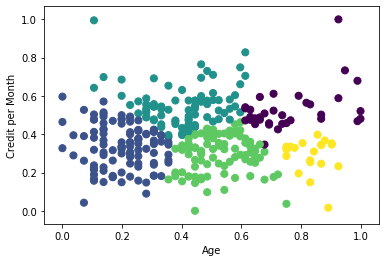

In [90]:
plt.scatter(data2["Age"], data2["Credit_per_Month"], c = labels1, s = 50, cmap = 'viridis')
plt.xlabel("Age")
plt.ylabel("Credit per Month")

In [91]:
data_car["labels_HC"] = pd.DataFrame(labels1)
data_car.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Credit_per_Month,labels_KMeans,labels_HC,labels_DBSCAN
4,53,male,2,free,4870,24,car,202.916667,0.0,4.0,0.0
7,35,male,3,rent,6948,36,car,193.000000,0.0,0.0,0.0
9,28,male,3,own,5234,30,car,174.466667,2.0,3.0,0.0
10,25,female,2,rent,1295,12,car,107.916667,3.0,2.0,0.0
13,60,male,1,own,1199,24,car,49.958333,2.0,3.0,0.0


### 6. Criteria In Every Cluster

In [93]:
data_cluster2 = data_car.groupby("labels_HC")
col = ["Age", "Credit_per_Month"]
data_cluster3 = data_cluster2[col]
data_cluster3.mean().sort_values("Age")

,Age,Credit_per_Month
labels_HC,,
0.0,30.777778,151.097840
3.0,36.451613,157.150800
1.0,38.909091,247.811261
2.0,39.208333,270.395990
4.0,43.500000,223.298611


***
## DBSCAN
***

### 1. Data for DBSCAN

In [41]:
col = ["Age", "Credit_per_Month"]
data4 = data2[col]
data4.head()

,Age,Credit_per_Month
0,0.737322,0.454196
1,0.423388,0.443275
2,0.254565,0.421272
3,0.168824,0.316576
4,0.831176,0.148719


### 2. Find Optimal Values of Epsilon and Minimal Samples (Auto)

In [42]:
sc = 9999999
for i in np.arange(0.1, 0.5, 0.005):
    for j in range(2, 30):
        dbscan = DBSCAN(eps = i, min_samples =j)
        model = dbscan.fit(data4)
        labels = model.labels_
        try:
            err = silhouette_score(data4, labels)
        except:
            continue
        if sc > err:
            sc = err
            best_i = i
            best_j = j
print(best_i, best_j, sc)

0.1 15 0.2680913135465922


### 3. Find Optimal Values of Epsilon and Minimal Samples (Manual)

In [43]:
dbscan = DBSCAN(eps = 0.125, min_samples = 5)
dbscan.fit(data4)
silhouette_score(data4, dbscan.labels_)

0.475284968399147

In [44]:
dbscan = DBSCAN(eps = 0.075, min_samples = 15)
dbscan.fit(data4)
silhouette_score(data4, dbscan.labels_)

0.05666673159799868

### 4. DBSCAN Modelling

In [45]:
dbscan = DBSCAN(eps = 0.125, min_samples = 5)
dbscan.fit(data4)

DBSCAN(algorithm='auto', eps=0.125, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

### 5. DBSCAN Result

In [46]:
print(dbscan.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

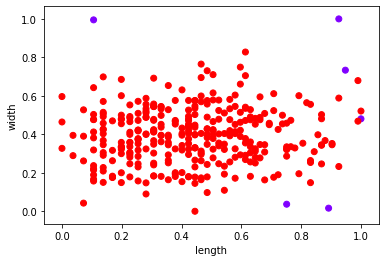

In [47]:
plt.scatter(data4["Age"], data4["Credit_per_Month"], c = dbscan.labels_ , cmap='rainbow')
plt.xlabel("length")
plt.ylabel("width")
plt.show()

In [48]:
labels2 = dbscan.labels_
data_car["labels_DBSCAN"] = pd.DataFrame(labels2)
data_car.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Credit_per_Month,labels_KMeans,labels_HC,labels_DBSCAN
4,53,male,2,free,4870,24,car,202.916667,0.0,2.0,0.0
7,35,male,3,rent,6948,36,car,193.000000,0.0,2.0,0.0
9,28,male,3,own,5234,30,car,174.466667,2.0,3.0,0.0
10,25,female,2,rent,1295,12,car,107.916667,3.0,1.0,0.0
13,60,male,1,own,1199,24,car,49.958333,2.0,3.0,0.0


### 6. Criteria In Every Cluster

In [110]:
data_cluster3 = data_car.groupby("labels_DBSCAN")
col = ["Age", "Credit_per_Month"]
data_cluster4 = data_cluster3[col]
data_cluster4.mean().sort_values("Age")

,Age,Credit_per_Month
labels_DBSCAN,,
-1.0,26.500000,109.166667
0.0,38.019802,218.022664


***
## Choose Clustering Technique
***

Berdasarkan hasil clustering dengan menggunakan beberapa algoritma di atas, algoritma yang dipilih adalah Hierarchical Algorithm dengan menggunakan jarak eucledian dan ward linkage. Hierarchical Algorithm mampu menghasilkan cluster yang memiliki perbedaan secara jelas berdasarkan dari variable yang dipilih yaitu "Age" dan "Credit per Month" sehingga kita bisa lebih mudah melakukan segmentasi pada para pengguna kredit dibandingkan dengan 2 algoritma yang lainnya.

***
## Business Insight
***

### 1. Find Criteria in Every Cluster

In [108]:
col = ["Age", "Credit_per_Month"]
data_cluster1 = data_cluster[col]
data_cluster1.mean().sort_values("Age")

,Age,Credit_per_Month
labels_HC,,
0.0,30.777778,151.097840
3.0,36.451613,157.150800
1.0,38.909091,247.811261
2.0,39.208333,270.395990
4.0,43.500000,223.298611


### 2.1 Klaster 0 (Average Age = 30.77 and Average Credit per Month = 151.09)

In [137]:
data_cluster0 = data_car[data_car["labels_HC"]==0]

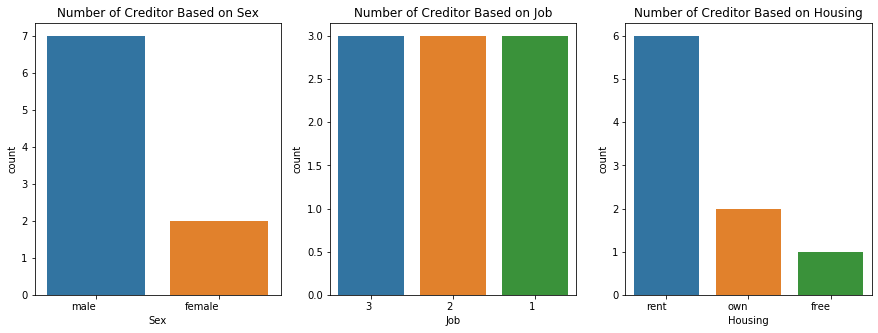

In [138]:
f = plt.figure(figsize=(15,5))

f.add_subplot(1,3,1)
ax = sns.countplot(x = "Sex", data = data_cluster0, order = data_cluster0["Sex"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Sex")
ax

f.add_subplot(1,3,2)
ax = sns.countplot(x = "Job", data = data_cluster0, order = data_cluster0["Job"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Job")
ax

f.add_subplot(1,3,3)
ax = sns.countplot(x = "Housing", data = data_cluster0, order = data_cluster0["Housing"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Housing")
ax

Pada klaster ini tidak terdapat resiko yang besar, dikarenakan jumlah pembayaran kredit per bulannya tidak menunjukkan jumlah yang tinggi, dengan kata lain mobil yang dibeli pada klaster ini adalah mobil yang murah. Selain itu jika kita lihat dari pekerjaan para pengguna kredit, pekerjaan paling rendah adalah job tipe 1 dimana meskipun unskilled tetapi merupakan penduduk.

### 2.2 Klaster 1 (Average Age = 38.90 and Average Credit per Month = 247.81)

In [134]:
data_cluster1 = data_car[data_car["labels_HC"]==1]

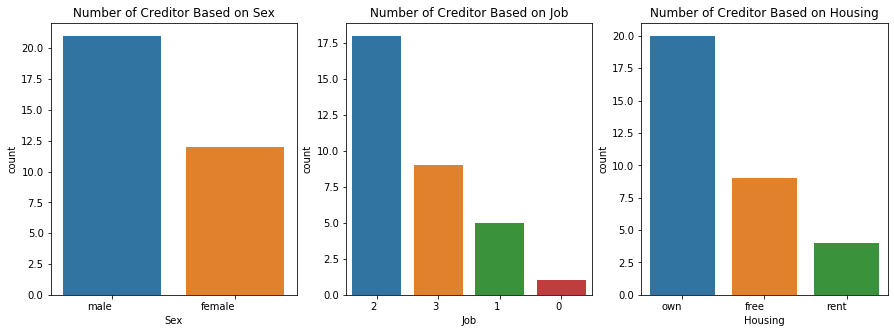

In [136]:
f = plt.figure(figsize=(15,5))

f.add_subplot(1,3,1)
ax = sns.countplot(x = "Sex", data = data_cluster1, order = data_cluster1["Sex"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Sex")
ax

f.add_subplot(1,3,2)
ax = sns.countplot(x = "Job", data = data_cluster1, order = data_cluster1["Job"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Job")
ax

f.add_subplot(1,3,3)
ax = sns.countplot(x = "Housing", data = data_cluster1, order = data_cluster1["Housing"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Housing")
ax

Pada klaster ini terdapat resiko yang cukup besar, dikarenakan jumlah pembayaran kredit per bulannya menunjukkan jumlah yang cukup tinggi, dengan kata lain mobil yang dibeli pada klaster ini adalah mobil yang cukup mahal. Jika kita lihat dari pekerjaan para pengguna kredit, terdapat tipe pekerjaan dengan tipe 0 dimana termasuk unskilled dan bukan merupakan penduduk.

### 2.3 Klaster 2 (Average Age = 39.20 and Average Credit per Month = 270.39)

In [139]:
data_cluster2 = data_car[data_car["labels_HC"]==2]

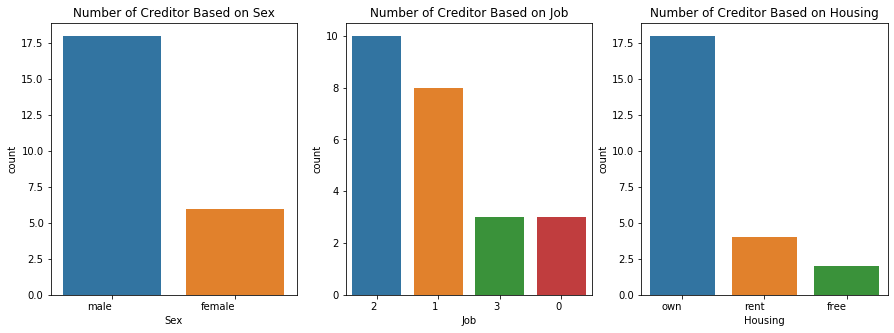

In [140]:
f = plt.figure(figsize=(15,5))

f.add_subplot(1,3,1)
ax = sns.countplot(x = "Sex", data = data_cluster2, order = data_cluster2["Sex"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Sex")
ax

f.add_subplot(1,3,2)
ax = sns.countplot(x = "Job", data = data_cluster2, order = data_cluster2["Job"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Job")
ax

f.add_subplot(1,3,3)
ax = sns.countplot(x = "Housing", data = data_cluster2, order = data_cluster2["Housing"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Housing")
ax

Pada klaster ini terdapat resiko yang besar, dikarenakan jumlah pembayaran kredit per bulannya menunjukkan jumlah yang tinggi, dengan kata lain mobil yang dibeli pada klaster ini adalah mobil yang mahal. Jika kita lihat dari pekerjaan para pengguna kredit, terdapat tipe pekerjaan dengan tipe 0 dimana termasuk unskilled dan bukan merupakan penduduk.

### 2.4 Klaster 3 (Average Age = 36.45 and Average Credit per Month = 157.15)

In [142]:
data_cluster3 = data_car[data_car["labels_HC"]==3]

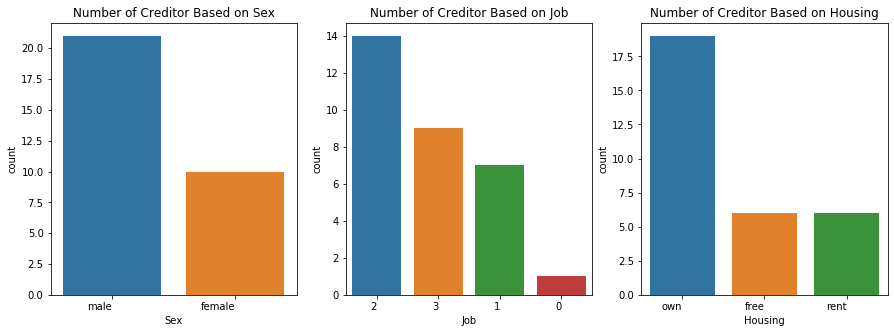

In [143]:
f = plt.figure(figsize=(15,5))

f.add_subplot(1,3,1)
ax = sns.countplot(x = "Sex", data = data_cluster3, order = data_cluster3["Sex"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Sex")
ax

f.add_subplot(1,3,2)
ax = sns.countplot(x = "Job", data = data_cluster3, order = data_cluster3["Job"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Job")
ax

f.add_subplot(1,3,3)
ax = sns.countplot(x = "Housing", data = data_cluster3, order = data_cluster3["Housing"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Housing")
ax

Pada klaster ini tidak terdapat resiko yang cukup besar, dikarenakan jumlah pembayaran kredit per bulannya tidak menunjukkan jumlah yang cukup tinggi, dengan kata lain mobil yang dibeli pada klaster ini adalah mobil yang cukup murah. Jika kita lihat dari pekerjaan para pengguna kredit, pekerjaan paling rendah adalah job tipe 0 dimana termasuk unskilled dan bukan merupakan penduduk tetapi jumlahnya hanya 1.

### 2.5 Klaster 4 (Average Age = 43.50 and Average Credit per Month = 223.29)

In [144]:
data_cluster4 = data_car[data_car["labels_HC"]==4]

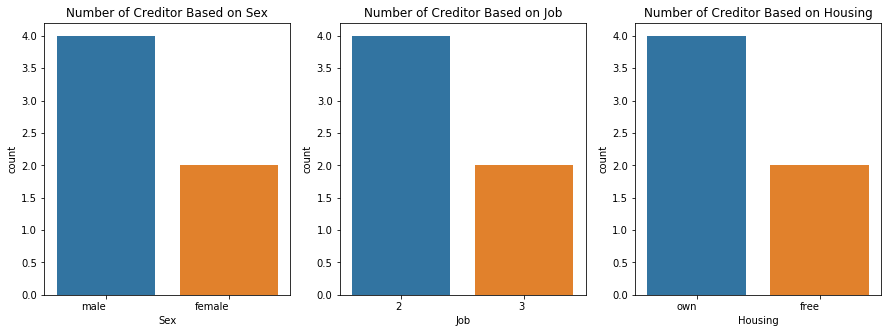

In [145]:
f = plt.figure(figsize=(15,5))

f.add_subplot(1,3,1)
ax = sns.countplot(x = "Sex", data = data_cluster4, order = data_cluster4["Sex"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Sex")
ax

f.add_subplot(1,3,2)
ax = sns.countplot(x = "Job", data = data_cluster4, order = data_cluster4["Job"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Job")
ax

f.add_subplot(1,3,3)
ax = sns.countplot(x = "Housing", data = data_cluster4, order = data_cluster4["Housing"].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title("Number of Creditor Based on Housing")
ax

Pada klaster ini tidak terdapat resiko yang besar, dikarenakan jumlah pembayaran kredit per bulannya menunjukkan jumlah yang cukup tinggi tetapi jika kita lihat dari pekerjaan para pengguna kredit, tipe pekerjaan menunjukkan tipe 2 yaitu skilled dan tipe 3 yaitu high skilled, dan jika kita lihat dari rumah yang dimiliki sebagian besar memiliki rumah sendiri.

***
Selain untuk melihat resiko pada tiap klaster, hasil klastering yang didapat, dapat kita jadikan sebagai strategi marketing untuk menawarkan mobil dengan harga tertentu kepada para pelanggan berdasarkan dari usia, pekerjaan dan kepemilikan rumah. Sebagai contoh, berdasarkan hasil klastering kita dapat mengetahui bahwa jika pelanggan dengan usia x, tipe pekerjaan x, dan status kepemilikan rumah x maka akan lebih memilih mobil dengan harga x.
***